In [16]:
#Dans cette partie nous allons effectuer l'évaluation des modèles 

In [12]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
import numpy as np  
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter 
from sklearn.feature_selection import SelectKBest , chi2  
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  
from sklearn.metrics import confusion_matrix 
import time 

In [3]:
df = pd.read_csv('Base2.csv')
df1=df 
df 
#Encodage
le = preprocessing.LabelEncoder()
df['class']=le.fit_transform(df['class']) 
# OneHotEncoding encoding of protocol_type , service and flag columns 
from sklearn.preprocessing import OneHotEncoder 
ohe=OneHotEncoder() 
ohe.fit_transform(df[['protocol_type','service','flag']]).toarray()
#Encodage des  variable catégoriques protocol_type , service et flag 
feature_arr=ohe.fit_transform(df[['protocol_type','service','flag']]).toarray() 
ohe.categories_
feature_labels= ohe.categories_ 
feature_labels=['icmp', 'tcp', 'udp','IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier',
        'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u',
        'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp',
        'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784',
        'http_443', 'http_8001', 'imap4', 'iso_tsap', 'klogin', 'kshell',
        'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm',
        'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u',
        'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private',
        'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh',
        'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time',
        'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois','OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3',
        'SF', 'SH']

features=pd.DataFrame(feature_arr,columns=feature_labels)
df=pd.concat([df,features],axis=1)
df
 
df.drop(['protocol_type','service','flag'], axis=1, inplace=True) 



In [4]:
X = df.drop('class', axis=1) 
y = df['class'] 
# Some Features has very low variance 
# we can apply VarianceThreshold selector (not really recommended less complex than Wapped method)  
from sklearn.feature_selection import VarianceThreshold 
selector= VarianceThreshold(threshold=0.25)
selector.fit_transform(X).shape   

(148517, 11)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)    

In [8]:
start=time.time() 
pipe_log = make_pipeline(StandardScaler(),LogisticRegression())
pipe_log.fit(X_train, y_train)  # apply scaling on training data
pipe_log.score(X_test, y_test)  # apply scaling on testing data.'' 
end = time.time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_log.score(X_test, y_test) )   

Temps d'exécution : 2.6ms 0.9581470509022354


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
start = time.time()
pipe_kn = make_pipeline(StandardScaler(), KNeighborsClassifier())
pipe_kn.fit(X_train,y_train)  # apply scaling on training data
pipe_kn.score(X_test, y_test) 
end = time.time()
elapsed = end - start

print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_kn.score(X_test, y_test) )  

Temps d'exécution : 9.8e+01ms 0.9921896040937247


In [10]:
start = time.time()
pipe_dc = make_pipeline(StandardScaler(), DecisionTreeClassifier())
pipe_dc.fit(X_train, y_train)  # apply scaling on training data
pipe_dc.score(X_test, y_test) 
end = time.time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_dc.score(X_test, y_test) ) 

Temps d'exécution : 1.8ms 0.9943980608672233


In [11]:
start = time.time()
pipe_rf= make_pipeline(StandardScaler(), RandomForestClassifier())
pipe_rf.fit(X_train, y_train)  # apply scaling on training data
pipe_rf.score(X_test, y_test) 
end = time.time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_rf.score(X_test, y_test) )   

Temps d'exécution : 9.9ms 0.9957446808510638


In [14]:
log_pred=pipe_log.predict(X_test) 
kn_pred=pipe_kn.predict(X_test) 
dc_pred=pipe_dc.predict(X_test)  
rf_pred=pipe_rf.predict(X_test) 

# Model Evaluation 

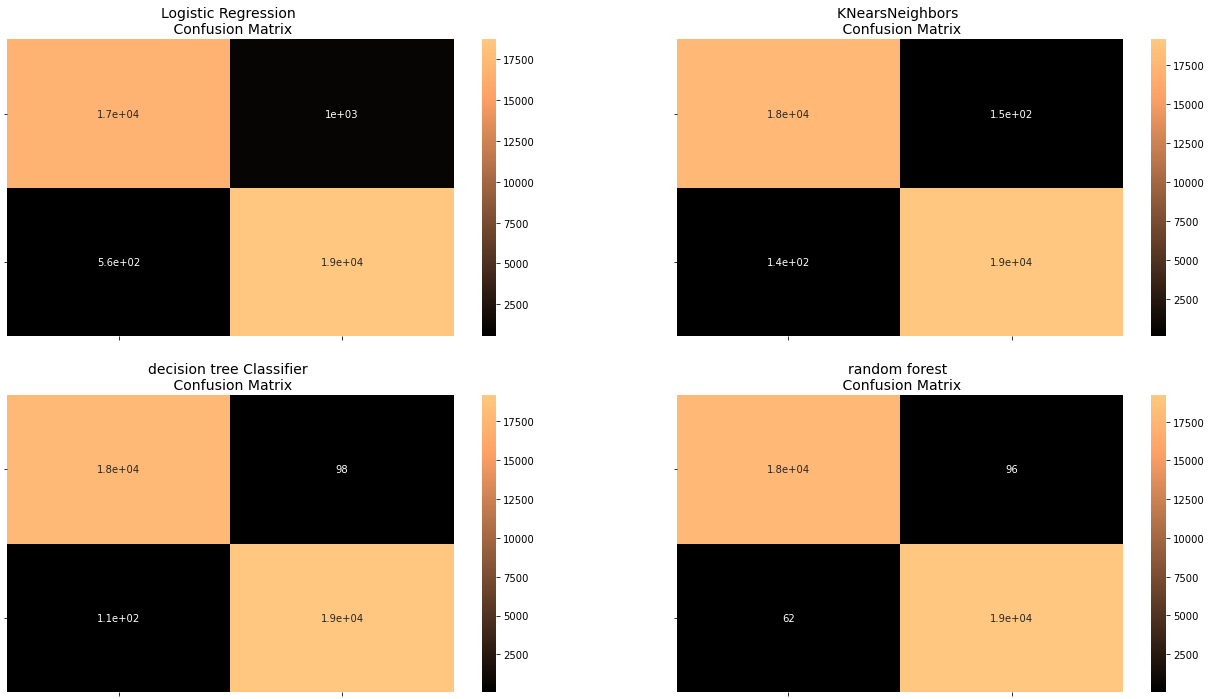

In [15]:
pipe_log_cf = confusion_matrix(y_test, log_pred)
pipe_kn_cf = confusion_matrix(y_test,kn_pred)
pipe_dc_cf = confusion_matrix(y_test, dc_pred )
pipe_rf_cf = confusion_matrix(y_test, rf_pred)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(pipe_log_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(pipe_kn_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(pipe_dc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("decision tree Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(pipe_rf_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("random forest \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show() 

In [17]:
#Random forest est le mieulleur dans notre cas . 

In [18]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, log_pred))

print('KNears Neighbors:')
print(classification_report(y_test, kn_pred))

print('decision tree Classifier:')
print(classification_report(y_test, dc_pred))

print('Random Forest Classifier :')
print(classification_report(y_test, rf_pred))  

Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     17862
           1       0.95      0.97      0.96     19268

    accuracy                           0.96     37130
   macro avg       0.96      0.96      0.96     37130
weighted avg       0.96      0.96      0.96     37130

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17862
           1       0.99      0.99      0.99     19268

    accuracy                           0.99     37130
   macro avg       0.99      0.99      0.99     37130
weighted avg       0.99      0.99      0.99     37130

decision tree Classifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17862
           1       0.99      0.99      0.99     19268

    accuracy                           0.99     37130
   macro avg       0.99      0.99      0.99     37130
weighted 

In [19]:
# En se basant sur les metrics tel que Recall , f1_score et la précision nous avons mis en évidence que 
# RandomForest est le mieulleur algorithmes de classification . 

# Deep learning : 

In [20]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X =X_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))  

C:\Users\DELL\AppData\Local\Temp/ipykernel_17992/56083811.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)


Epoch 1/100
2321/2321 [==============================] - 2s 657us/step - loss: 5.7132 - accuracy: 0.8567
Epoch 2/100
2321/2321 [==============================] - 2s 652us/step - loss: 0.4182 - accuracy: 0.8406
Epoch 3/100
2321/2321 [==============================] - 2s 665us/step - loss: 0.3401 - accuracy: 0.8719
Epoch 4/100
2321/2321 [==============================] - 2s 667us/step - loss: 0.2938 - accuracy: 0.8886
Epoch 5/100
2321/2321 [==============================] - 1s 646us/step - loss: 0.2326 - accuracy: 0.9235
Epoch 6/100
2321/2321 [==============================] - 2s 650us/step - loss: 0.1728 - accuracy: 0.9447
Epoch 7/100
2321/2321 [==============================] - 2s 651us/step - loss: 0.1298 - accuracy: 0.9569
Epoch 8/100
2321/2321 [==============================] - 2s 721us/step - loss: 0.3834 - accuracy: 0.9565
Epoch 9/100
2321/2321 [==============================] - 2s 730us/step - loss: 0.1098 - accuracy: 0.9536
Epoch 10/100
2321/2321 [==============================]

2321/2321 [==============================] - 1s 643us/step - loss: 0.0858 - accuracy: 0.9657
Epoch 79/100
2321/2321 [==============================] - 1s 638us/step - loss: 0.8976 - accuracy: 0.9598
Epoch 80/100
2321/2321 [==============================] - 1s 638us/step - loss: 0.0852 - accuracy: 0.9591
Epoch 81/100
2321/2321 [==============================] - 2s 763us/step - loss: 0.0849 - accuracy: 0.9611
Epoch 82/100
2321/2321 [==============================] - 2s 653us/step - loss: 0.0886 - accuracy: 0.9579
Epoch 83/100
2321/2321 [==============================] - 2s 688us/step - loss: 0.1023 - accuracy: 0.9602
Epoch 84/100
2321/2321 [==============================] - 1s 634us/step - loss: 0.0858 - accuracy: 0.9590
Epoch 85/100
2321/2321 [==============================] - 2s 657us/step - loss: 0.0871 - accuracy: 0.9625
Epoch 86/100
2321/2321 [==============================] - 2s 663us/step - loss: 0.0858 - accuracy: 0.9593
Epoch 87/100
2321/2321 [==============================] - 2

2321/2321 [==============================] - 2s 651us/step - loss: 0.0791 - accuracy: 0.9647
Epoch 55/100
2321/2321 [==============================] - 2s 682us/step - loss: 0.0813 - accuracy: 0.9656
Epoch 56/100
2321/2321 [==============================] - 1s 646us/step - loss: 0.1225 - accuracy: 0.9624
Epoch 57/100
2321/2321 [==============================] - 2s 667us/step - loss: 0.0966 - accuracy: 0.9587
Epoch 58/100
2321/2321 [==============================] - 2s 672us/step - loss: 0.0883 - accuracy: 0.9638
Epoch 59/100
2321/2321 [==============================] - 2s 685us/step - loss: 0.3776 - accuracy: 0.9657
Epoch 60/100
2321/2321 [==============================] - 2s 748us/step - loss: 0.0977 - accuracy: 0.9636
Epoch 61/100
2321/2321 [==============================] - 2s 678us/step - loss: 0.0913 - accuracy: 0.9622
Epoch 62/100
2321/2321 [==============================] - 2s 675us/step - loss: 0.0906 - accuracy: 0.9632
Epoch 63/100
2321/2321 [==============================] - 2

2321/2321 [==============================] - 2s 655us/step - loss: 0.0794 - accuracy: 0.9703
Epoch 31/100
2321/2321 [==============================] - 2s 727us/step - loss: 0.0812 - accuracy: 0.9694
Epoch 32/100
2321/2321 [==============================] - 2s 660us/step - loss: 0.2700 - accuracy: 0.9629
Epoch 33/100
2321/2321 [==============================] - 1s 627us/step - loss: 0.1226 - accuracy: 0.9528
Epoch 34/100
2321/2321 [==============================] - 1s 629us/step - loss: 0.1954 - accuracy: 0.9094
Epoch 35/100
2321/2321 [==============================] - 1s 639us/step - loss: 0.1337 - accuracy: 0.9423
Epoch 36/100
2321/2321 [==============================] - 2s 648us/step - loss: 0.1236 - accuracy: 0.9428
Epoch 37/100
2321/2321 [==============================] - 2s 650us/step - loss: 0.1114 - accuracy: 0.9431
Epoch 38/100
2321/2321 [==============================] - 1s 628us/step - loss: 0.0990 - accuracy: 0.9549
Epoch 39/100
2321/2321 [==============================] - 2